<a href="https://colab.research.google.com/github/ArmaanBhullar/grid_gdp_analysis/blob/master/colab_eof_analysis_gdp_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install rasterio
!pip install eofs netCDF4 tqdm seaborn 
!pip install pyshp
!pip install geopandas
!pip install rasterio
!pip install xarray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (191 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

     |████████████████████████████████| 15.2MB 14.7MB/s 
     |████████████████████████████████| 1.0MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 45.3MB/s 
     |████████████████████████████████| 317kB 48.5MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-cp36-none-any.whl size=1100357 sha256=83d3a7e58b231a96109900e62ea47ea83b2767422063028725ca6ada88fbb016
  Stored in directory: /root/.cache/pip/wheels/47/f8/64/72dfdafae89c380846799c1396957cddd04decf459242ea988
Successfully built eofs
     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 205kB/s 


In [0]:
import xarray

In [0]:
from netCDF4 import Dataset
import numpy as np
import eofs
import tqdm
import matplotlib.pyplot as plt
# import jupyterthemes
import seaborn as sns
# from jupyterthemes import jtplot

In [0]:
# jupyterthemes.jtplot.style('onedork')
sns.set()

# No execution needed, variable will be loaded later

In [3]:
## connect to drive for data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path =  "/content/drive/My Drive/data"

## Construct array with GDP data - not needed as already done once

In [7]:
gdp = Dataset('/content/drive/My Drive/data/GDP_PPP_1990_2015_5arcmin_v2.nc', 'r')
print(gdp)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 02-Aug-2017 14:30:34
    resolution: 5 arc-min
    projection: WGS84
    extent: lat: 90�S - 90�N; lon: 180�E - 180�W
    product: Total Gross Domestic Production (GDP) (PPP) for years 1990-2015
    citation: When using the data, please refer to following publication: TBA
    more information: For more information, see: TBA
    dimensions(sizes): longitude(4320), latitude(2160), time(26)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float32 time(time), float32 GDP_PPP(time,latitude,longitude)
    groups: 


In [8]:
gdp.projection

'WGS84'

Select a subset of latitudes and longitudes and perform EOF analysis for India
north_lat = 37°6′ N
south_lat = 8°4′N
east_long = 97°25′ E
west_long = 68°7′ E

In [0]:
import sys
import pickle
lons = pickle.load( open('/content/drive/My Drive/data/GDP_PPP_1990_2015_lons.pkl', 'rb'))
gdp_arr = pickle.load( open('/content/drive/My Drive/data/GDP_PPP.pkl', 'rb'))
lats = pickle.load( open('/content/drive/My Drive/data/GDP_PPP_1990_2015_lats.pkl', 'rb'))
years = pickle.load( open('/content/drive/My Drive/data/GDP_PPP_1990_2015_years.pkl', 'rb'))

In [0]:
east_lon = 97+25/60
west_lon = 68+7/60
north_lat = 37.1
south_lat = 8+4/60

In [0]:
#Load india shapefile and mask everything except india in gdp data
import os
import shapefile as shp
shp_path = os.path.join(root_path,"INDIA/INDIA.shp")
sf = shp.Reader(shp_path)

In [0]:
india = geopandas.read_file(os.path.join(root_path,"INDIA/INDIA.shp"))

In [14]:
india.ST_NAME.tolist()

['ANDAMAN AND NICOBAR ISLANDS',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'CHANDIGARH',
 'Chhattisgarh',
 'DADRA AND NAGAR HAVELI',
 'DAMAN AND DIU',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'LAKSHADWEEP',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Nct Of Delhi',
 'Orissa',
 'Pondicherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [0]:
import xarray
world_xarray = xarray.Dataset(coords={'longitude': lons,
                          'latitude': lats})

In [0]:
import geopandas
from rasterio import features
from affine import Affine

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords['latitude'], coords['longitude'])
    out_shape = (len(coords['latitude']), len(coords['longitude']))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    return xarray.DataArray(raster, coords=coords, dims=('latitude', 'longitude'))

In [0]:
state_ids = {k: i for i, k in enumerate(india.ST_NAME)}
# print(state_ids)
shapes = [(shape, n) for n, shape in enumerate(india.geometry)]
ds['states'] = rasterize(shapes, ds.coords)
world_xarray['india_states'] = rasterize(shapes, world_xarray.coords)

In [0]:
print(shapes)

In [0]:
# ds.states.where(ds.states == state_ids['Punjab' ]).plot()
ds.states.plot(cmap='jet', figsize=(15, 15))

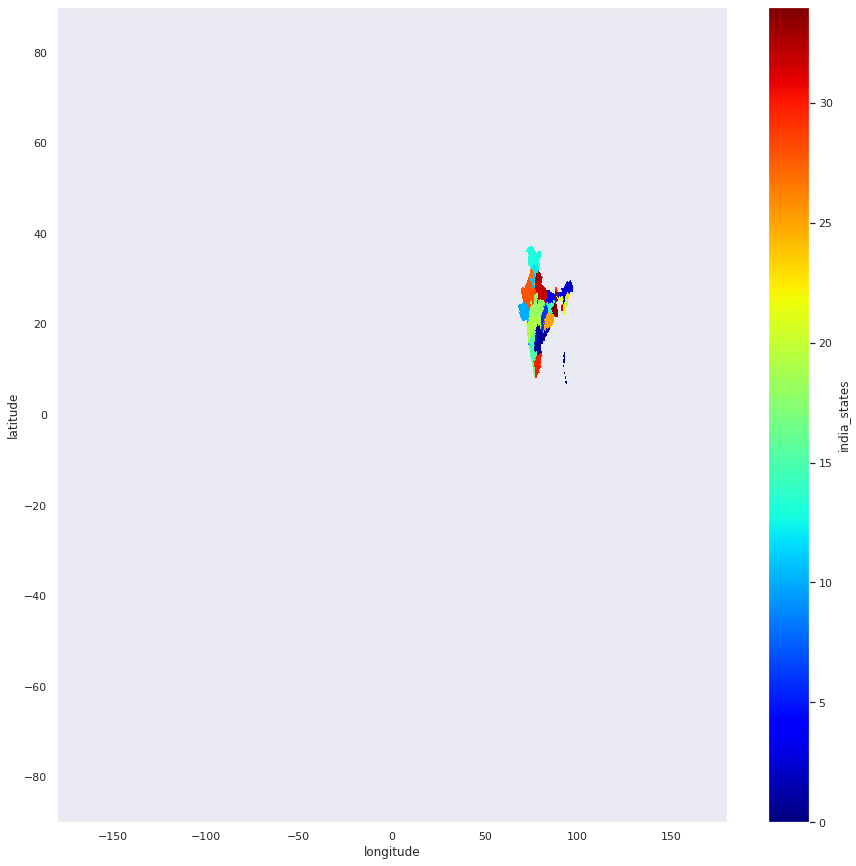

In [22]:
world_xarray.india_states.plot(cmap='jet', figsize=(15, 15))

In [0]:
tmp = world_xarray.to_array()
india_masked_array = tmp.to_masked_array(copy=True)

Now extract the mask, apply it to GDP data and store the output, finally write a function to do the same and be done with this notebook. Put the function in a py file.

In [30]:
sha = india_masked_array.mask.shape
print(sha)
print("Shape of array and num of points = ", sha, sha[1]*sha[2])
print("Number of non masked points and ratio of such points = ", np.sum(~india_masked_array.mask), np.sum(~india_masked_array.mask)/(sha[1]*sha[2]))

(1, 2160, 4320)
Shape of array and num of points =  (1, 2160, 4320) 9331200
Number of non masked points and ratio of such points =  41904 0.0044907407407407405


In [0]:
india_timed_mask = np.zeros(shape=gdp_arr.shape)
india_timed_mask.shape
for i in range(26):
  india_timed_mask[i] = india_masked_array.mask.copy()

In [0]:
gdp_india_masked = np.ma.masked_array(data=gdp_arr, mask=india_timed_mask, copy=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  """Entry point for launching an IPython kernel.


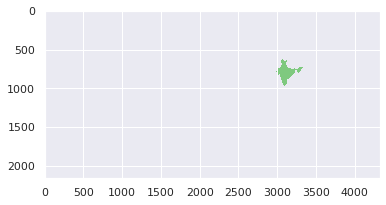

In [48]:
plt.imshow(gdp_india_masked[1], cmap='Accent', shape=(15, 15))

(9330587,)
(9331200,)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([9330586.5 , 9330586.51, 9330586.52, 9330586.53, 9330586.54,
        9330586.55, 9330586.56, 9330586.57, 9330586.58, 9330586.59,
        9330586.6 , 9330586.61, 9330586.62, 9330586.63, 9330586.64,
        9330586.65, 9330586.66, 9330586.67, 9330586.68, 9330586.69,
        9330586.7 , 9330586.71, 9330586.72, 9330586.73, 9330586.74,
        9330586.75, 9330586.76, 9330586.77, 9330586.78, 9330586.79,
        9330586.8 , 9330586.81, 9330586.82, 9330586.83, 9330586.84,
        9330586.85, 9330586.86, 9330586.87, 9330586.88, 9330586.89,
      

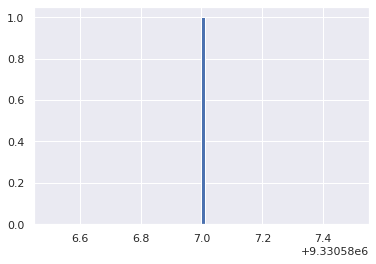

In [68]:
print(gdp_india_masked[0].flatten()[(gdp_india_masked[0].flatten()!=-9.0) & (gdp_india_masked[0].flatten()!=0.0)].shape)
print(gdp_india_masked[0].flatten().shape)
plt.hist(x=gdp_india_masked[0].flatten()[(gdp_india_masked[0].flatten()!=-9.0) & (gdp_india_masked[0].flatten()!=0.0)].shape, bins=100)

In [0]:
new_mask_ocean_world = (gdp_arr[0]!=-9.0) & (gdp_arr[0]!=0.0)

In [37]:
gdp_arr.shape

(26, 2160, 4320)

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.imshow(india_masked_array[0])for an upd

In [0]:
india.crs

In [0]:
## Next steps as follows:
# Create a masked array of same shape as original with mask everything except India, save it, then go ahead with eof analysis.